Evaluating Random Forest Performance
Import the required libraries

In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install scipy==1.14.1

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Msi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Msi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Msi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Msi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


^C


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Msi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.5 MB 1.4 MB/s eta 0:00:32
    --------------------------------------- 1.0/44.5 MB 2.1 MB/s eta 0:00:21
   - -------------------------------------- 1.6/44.5 MB 2.0 MB/s eta 0:00:21
   - -------------------------------------- 1.8/44.5 MB 2.1 MB/s eta 0:00:21
   -- ------------------------------------- 2.4/44.5 MB 2.1 MB/s eta 0:00:21
   -- ------------------------------------- 2.6/44.5 MB 2.0 MB/s eta 0:00:21
   -- ------------------------------------- 3.1/44.5 MB 2.1 MB/s eta 0:00:21
   --- ------------------------------------ 3.7/44.5 MB 2.1 MB/s eta 0:00:20
   --- ------------------------------------ 4.2/44.5 MB 2.1 MB/s eta 0:00:20
   ---- ----------------------------------- 4.7/44.5 MB 2.1 MB/s eta 0:00:19
   ---- ----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

Load the California Housing data set

In [3]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

PRINT & SPLIT

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explore the training data

In [6]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Considering the 25th to the 75th percentile range, most of the median house prices fall within $119,300 and $265,000.

the median house prices distribution

Text(0, 0.5, 'Frequency')

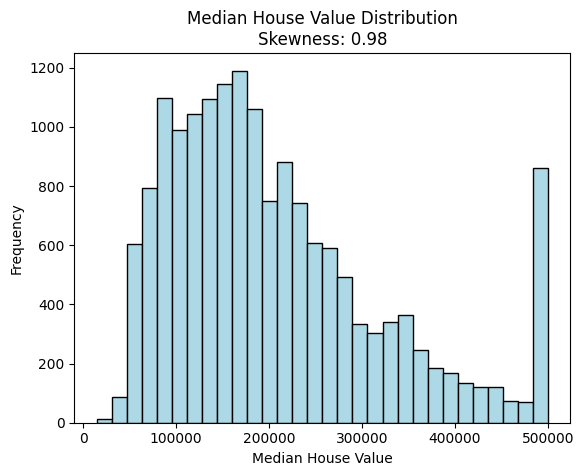

In [7]:
# Plot the distribution
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

Model fitting and prediction
Let's fit a random forest regression model to the data and use it to make median house price predicions.

In [8]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred_test = rf_regressor.predict(X_test)

### Estimate out-of-sample MAE, MSE, RMSE, and R²

In [9]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3276
Mean Squared Error (MSE): 0.2556
Root Mean Squared Error (RMSE): 0.5055
R² Score: 0.8050


he mean absolute error is $33,220.

So, on average, predicted median house prices are off by $33k.

Mean squared error is less intuitive to interpret, but is usually what is being minimized by the model fit.
On the other hand, taking the square root of MSE yields a dollar value, here RMSE = $50,630.

An R-squared score of 0.80 is not considered very high. It means the model explains about %80 of the variance in median house prices, although this interpretation can be misleading for compex data with nonlinear relationships, skewed values, and outliers. R-squard can still be useful for comparing models though.

These statistics alone don't explain any details about the performance of the model. For example, where did the model do well or poorly?

We aren't done yet!

Plot Actual vs Predicted values

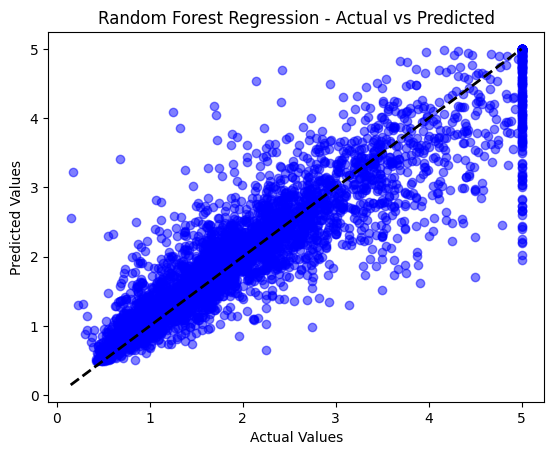

In [10]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

Plot the histogram of the residual errors (dollars)

Average error = -1215
Standard deviation of error = 50537


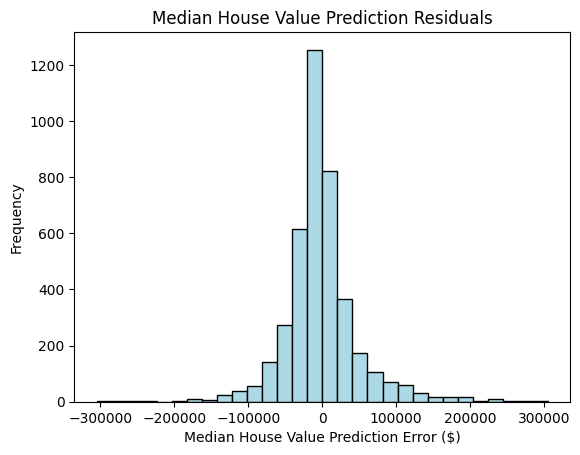

In [11]:
# Calculate the residual errors
residuals = 1e5*(y_test - y_pred_test)

# Plot the histogram of the residuals
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))

Plot the model residual errors by median house value.

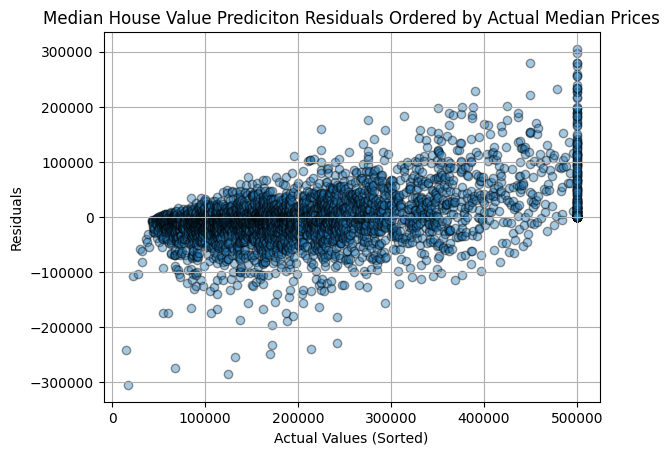

In [12]:
# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Although we saw a small average residual of only -$1400, you can see from this plot that the average error as a function of median house price is actually increasing from negative to positive values. In other words, lower median prices tend to be overpredicted while higher median prices tend to be underpredicted.

### Display the feature importances as a bar chart.

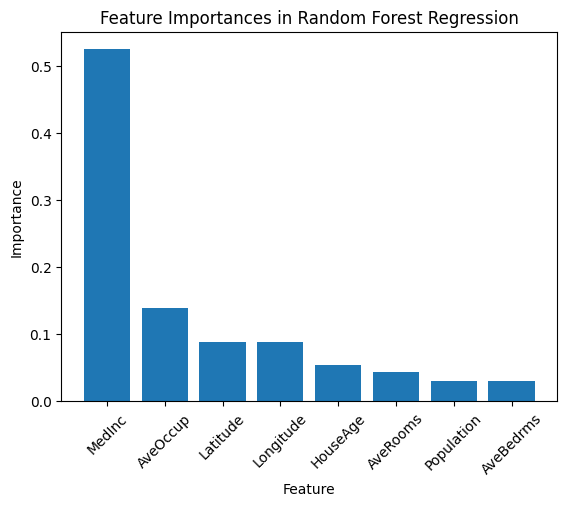

In [13]:
# Feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()

Compared to linear regression, random forest regression is quite robust against outliers and skewed distributions. This is because random forest regression doesn't make any assumptions about the data distribution, where linear regression performs best with normally distributed data.
Standardizing the data isn't necessary like it is for distance-based algortihms like KNN or SVMs.

Regarding the clipped vlaues, there is no variablilty in those values. Removing them in preprocessing might help the model to better explain the actual variance in the data.

The clipped values can also bias the predictions. Also these clipped values can mislead evaluation metrics. As you've learned from this lab, it's crucially important for you to visualize your results.